**Fabián Achury-Calderón**

dayronf.achuryc@konradlorenz.edu.co

**Modelado y Simulación**

**FUNDACIÓN UNIVERSITARIA KONRAD LORENZ**


# El Atractor de Lorenz

## Definición.

El atractor de Lorenz es un sistema dinámico determinista tridimensional no lineal de ecuaciones acopladas definido por Edward Lorenz, que tenía por objeto describir de forma en extremo simplificada, las dinámicas que se dan en el proceso de cambio en el clima, el sistema de ecuaciones es:

$$\dot{x}=\sigma y-\sigma x$$

$$\dot{y}=\rho x-y-xz$$

$$\dot{z}=xy-\beta z$$


* Es un sistema de ecuaciones diferenciales que modelan el cambio de las variables en el tiempo, por esto es un sistema dinámico.

* El sistema no contiene variables aleatorias, por lo que se le denomina determinístico.

* Se desarrolla en un espacio de tres dimensiones con coordenadas $x,y,z$, por lo que es tridimensional.

* Es no lineal ya que en las ecuaciones para $\dot{y}$ y $\dot{z}$ se tienen los términos $xz$ y $xy$ respectivamente.

* Las ecuaciones que describen el cambio de cada variable están acopladas ya que cada una de ellas involucra otras variables dependientes del tiempo.

La simplificación del modelo de manera conceptual puede explicarse así: suponga una *lámina* rectangular con determinada altura y determinada base, y con un grosor despreciable; en esta lámina estará confinada la atmósfera. A lo largo de la lámina existirá una dinámica en la que la atmósfera se moverá de arriba a abajo y de abajo a arriba como consecuencia de la diferencia en temperatura del ambiente (mayor en la base), describiendo en su movimiento bucles.

Las tres dimensiones del modelo no corresponden con puntos en el espacio propiamente dicho, sino con variables atmosféricas [6]:

- $x$: Tasa de vuelco convectivo; representa la velocidad y la dirección de circulación del fluido. Si $x > 0$ el fluido circula en sentido horario mientras que si $x < 0$ el fluido circula en sentido antihorario.

- $y$: Variación de temperatura horizontal.

- $z$: Desviación del gradiente vertical de temperatura de la linealidad, es decir, si $z>0$, los gradientes de temperatura más acusados ocurren en las fronteras.

En cuanto a los parámetros [6]:

- $\sigma$: Es el número de Prandtl, un factor adimensional calculado para el medio transmisor de la temperatura (del que se encuentre compuesta la atmósfera). El número de Prandtl es el cociente de $\frac{\mu c_{p}}{\kappa}$, donde $\mu$ es la viscosidad, $c_{p}$ es el calor específico a presión constante y $\kappa$ es la conductividad térmica del medio. Puede interpretarse como un factor que cuantifica el nivel de *deformación* de un medio o elemento frente a las variaciones en la temperatura.

- $\rho$: Es el número de Rayleigh, un factor adimensional calculado para el medio transmisor de la temperatura (del que se encuentre compuesta la atmósfera) y mide la capacidad de un fluído para transmitir calor.

- $\beta$: Razón adimensional entre la altura y el ancho del sistema.

Todos los parámetros del sistema son positivos y además $\sigma>\beta+1$.

## Simulación del sistema de Lorenz

Usaremos los mismos parámetros con los que en 1963 fue descubierto el comportamiento *extraño* de este atractor:

- $\sigma=10$

- $\rho=28$

- $\beta=2,667$

En la simulación cada paso del tiempo se discretiza con una duración de 0.01 Unidades de Tiempo; la sumulación se realiza durante 50 Unidades de Tiempo.

<h2> Veamos el código parte por parte</h2>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

'''
Se define la función que contiene al sistema de Lorenz
(x,y,z) son variables meteorológicas
Las tres ecuaciones se encuentran acopladas y modelan en cambio de la 
posición en cada cooordenada en el tiempo
s, r y b corresponden a los parámetros sigma, rho y beta
'''

def lorenz(x, y, z, s, r, b):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [6]:
# Se definen los parámetros del modelo

s=10
r=28
b=2.667

# Se define el tamaño y número de pasos

dt = 0.01          # Centésima de unidad de tiempo
num_steps = 5000   # Cincuenta unidades de tiempo
long_alter = 300   # Pasos que se observarán al final de la trayectoria

In [7]:
# Datos calculados partiendo de los valores iniciales T1

xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Arreglo de los últimos datos T1

sxs = np.empty(long_alter)
sys = np.empty(long_alter)
szs = np.empty(long_alter)

# Datos calculados partiendo de los valores iniciales T2

xss = np.empty(num_steps + 1)
yss = np.empty(num_steps + 1)
zss = np.empty(num_steps + 1)

# Arreglo de los últimos datos T2

sxss = np.empty(long_alter)
syss = np.empty(long_alter)
szss = np.empty(long_alter)

In [8]:
# Valores iniciales

xs[0], ys[0], zs[0] = (1., 0.00001, 2.)        # T1

xss[0], yss[0], zss[0] = (1., 0.00002, 2.)     # T2

In [9]:
# Recorrido, en cada punto suma la variación a la posición anterior

# Trayectoria 1

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], s, r, b)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

#Lista corta de los últimos long_alter pasos T1

for i in range(long_alter):
    sxs[i] = xs[num_steps-long_alter+i]
    sys[i] = ys[num_steps-long_alter+i]
    szs[i] = zs[num_steps-long_alter+i]

In [10]:
# Trayectoria 2

for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xss[i], yss[i], zss[i], s, r, b)
    xss[i + 1] = xss[i] + (x_dot * dt)
    yss[i + 1] = yss[i] + (y_dot * dt)
    zss[i + 1] = zss[i] + (z_dot * dt)

#Lista corta de los últimos long_alter pasos T2

for i in range(long_alter):
    sxss[i] = xss[num_steps-long_alter+i]
    syss[i] = yss[num_steps-long_alter+i]
    szss[i] = zss[num_steps-long_alter+i]

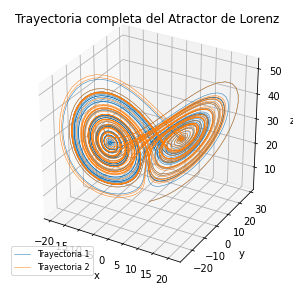

In [11]:
# Gráfica

# Trayectorias Completas

fig = plt.figure(figsize=(5,5))              # Tamaño de gráficas
ax1 = fig.gca(projection='3d')


ax1.plot(xs, ys, zs, lw=0.5, label="Trayectoria 1")          # T1
ax1.plot(xss, yss, zss, lw=0.5, label="Trayectoria 2")       # T2
ax1.set_xlabel("x", size=10)
ax1.set_ylabel("y", size=10)
ax1.set_zlabel("z", size=10)
ax1.set_title("Trayectoria completa del Atractor de Lorenz",size=12)
plt.legend(loc='lower left', fontsize=8);
plt.show()

## Referencias.


* [1] Hawking S. (1987). *A Brief History of Time: From the Big Bang to Black Holes*. Bantam Books.

* [2] Munguía M. (2006). *Sistemas Tipo Lorenz*. Sonora. Universidad de Sonora.

* [3] Øksendal, B. (2010). *Stochastic differential equations with applications*. Oslo. Springer.

* [4] Pérez, A. (2016). *Teoría del Caos*. Madrid. RBA.

* [5] Pérez C. (2017). *Estudio de algunos ejemplos y problemas de la Teoría del Caos*. Bogotá D.C. Universidad Distrital Francisco José de Caldas.

* [6] Represa S. (2016). *Ecuaciones de Lorenz*. Mar del Plata. Universidad Nacional de la Plata.

* [7] Smale, S. (2013). *Differrential Equations, Dynamical Systems and an Introduction to Chaos*. Elsevier.